<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Why Python for Finance?

## Zen of Python

In [5]:
import this

## The Python Ecosystem

In [10]:
100 * 2.5 + 50

300.0

In [3]:
# causes intentional error
# log(1)  

In [4]:
import math  

In [5]:
math.log(1)  

0.0

## Finance and Python Syntax

In [6]:
import math
import numpy as np  

In [7]:
S0 = 100.  
K = 105.  # <2
T = 1.0  
r = 0.05  
sigma = 0.2  

In [8]:
I = 100000  

In [9]:
np.random.seed(1000)  

In [10]:
z = np.random.standard_normal(I)  

In [11]:
ST = S0 * np.exp((r - sigma ** 2 / 2) * T + sigma * math.sqrt(T) * z)  

In [12]:
hT = np.maximum(ST - K, 0)  

In [26]:
C0 = math.exp(-r * T) * np.mean(hT)  

In [28]:
print('Value of the European call option: {:5.3f}.'.format(C0))  

Value of the European call option: 8.041.


In [15]:
%run bsm_mcs_euro.py

Value of the European call option 8.041.


## Time-to-Results

In [38]:
import numpy as np  
import pandas as pd  
from pylab import plt, mpl  

In [37]:
plt.style.use('seaborn')  
mpl.rcParams['font.family'] = 'serif'  
%matplotlib inline

In [39]:
data = pd.read_csv('tr_eikon_eod_data.csv',
                  index_col=0, parse_dates=True)
data.head(5)
data = pd.DataFrame(data['.SPX']) 
data.dropna(inplace=True)  
data.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   .SPX    2138 non-null   float64
dtypes: float64(1)
memory usage: 33.4 KB


In [58]:
data = pd.read_csv('tr_eikon_eod_data.csv',
                  index_col=0, parse_dates=True)
data.head(15)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.880,133.900,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.870,134.690,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.800,132.250,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.600,130.000,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.830,133.520,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-11,30.015684,30.270,20.950,130.308,171.56,114.73,1146.98,17.55,1.4513,1152.60,50.17,112.85
2010-01-12,29.674256,30.070,20.608,127.350,167.82,113.66,1136.22,18.25,1.4494,1127.30,48.35,110.49
2010-01-13,30.092827,30.350,20.960,129.110,169.07,114.62,1145.68,17.85,1.4510,1138.40,48.86,111.54


In [52]:
data = data['.SPX']
data

Date
2010-01-04    1132.99
2010-01-05    1136.52
2010-01-06    1137.14
2010-01-07    1141.69
2010-01-08    1144.98
               ...   
2018-06-25    2717.07
2018-06-26    2723.06
2018-06-27    2699.63
2018-06-28    2716.31
2018-06-29    2718.37
Name: .SPX, Length: 2138, dtype: float64

In [52]:
data = data['.SPX']
data

Date
2010-01-04    1132.99
2010-01-05    1136.52
2010-01-06    1137.14
2010-01-07    1141.69
2010-01-08    1144.98
               ...   
2018-06-25    2717.07
2018-06-26    2723.06
2018-06-27    2699.63
2018-06-28    2716.31
2018-06-29    2718.37
Name: .SPX, Length: 2138, dtype: float64

In [59]:
data = pd.DataFrame(data['.SPX'])
data.head(15)

,.SPX
Date,
2010-01-01,NaN
2010-01-04,1132.99
2010-01-05,1136.52
2010-01-06,1137.14
2010-01-07,1141.69
2010-01-08,1144.98
2010-01-11,1146.98
2010-01-12,1136.22
2010-01-13,1145.68


In [59]:
data = pd.DataFrame(data['.SPX'])
data.head(15)

,.SPX
Date,
2010-01-01,NaN
2010-01-04,1132.99
2010-01-05,1136.52
2010-01-06,1137.14
2010-01-07,1141.69
2010-01-08,1144.98
2010-01-11,1146.98
2010-01-12,1136.22
2010-01-13,1145.68


In [60]:
data.dropna(inplace=True)
data.head(15)

,.SPX
Date,
2010-01-04,1132.99
2010-01-05,1136.52
2010-01-06,1137.14
2010-01-07,1141.69
2010-01-08,1144.98
2010-01-11,1146.98
2010-01-12,1136.22
2010-01-13,1145.68
2010-01-14,1148.46


In [60]:
data.dropna(inplace=True)
data.head(15)

,.SPX
Date,
2010-01-04,1132.99
2010-01-05,1136.52
2010-01-06,1137.14
2010-01-07,1141.69
2010-01-08,1144.98
2010-01-11,1146.98
2010-01-12,1136.22
2010-01-13,1145.68
2010-01-14,1148.46


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   .SPX    2138 non-null   float64
dtypes: float64(1)
memory usage: 33.4 KB


In [62]:
data.pct_change().head(15)

,.SPX
Date,
2010-01-04,NaN
2010-01-05,0.003116
2010-01-06,0.000546
2010-01-07,0.004001
2010-01-08,0.002882
2010-01-11,0.001747
2010-01-12,-0.009381
2010-01-13,0.008326
2010-01-14,0.002427


In [63]:
data.shift(1).head(15)

,.SPX
Date,
2010-01-04,NaN
2010-01-05,1132.99
2010-01-06,1136.52
2010-01-07,1137.14
2010-01-08,1141.69
2010-01-11,1144.98
2010-01-12,1146.98
2010-01-13,1136.22
2010-01-14,1145.68


In [54]:
data = pd.read_csv('tr_eikon_eod_data.csv',
                  index_col=0, parse_dates=True)
data.head(5)
data = pd.DataFrame(data['.SPX']) 
data.dropna(inplace=True)  
data.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   .SPX    2138 non-null   float64
dtypes: float64(1)
memory usage: 33.4 KB


In [64]:
data['rets'] = np.log(data / data.shift(1))  
data.head(15)

,.SPX,rets
Date,,
2010-01-04,1132.99,NaN
2010-01-05,1136.52,0.003111
2010-01-06,1137.14,0.000545
2010-01-07,1141.69,0.003993
2010-01-08,1144.98,0.002878
2010-01-11,1146.98,0.001745
2010-01-12,1136.22,-0.009425
2010-01-13,1145.68,0.008291
2010-01-14,1148.46,0.002424


In [66]:
data['vola'] = data['rets'].rolling(252).std() * np.sqrt(252)  
data.tail(15)

,.SPX,rets,vola
Date,,,
2018-06-11,2782.00,0.001068,0.124353
2018-06-12,2786.85,0.001742,0.124350
2018-06-13,2775.63,-0.004034,0.124370
2018-06-14,2782.49,0.002468,0.124376
2018-06-15,2779.66,-0.001018,0.124355
2018-06-18,2773.75,-0.002128,0.124383
2018-06-19,2762.59,-0.004032,0.124219
2018-06-20,2767.32,0.001711,0.124015
2018-06-21,2749.76,-0.006366,0.124201


In [67]:
data.rolling?

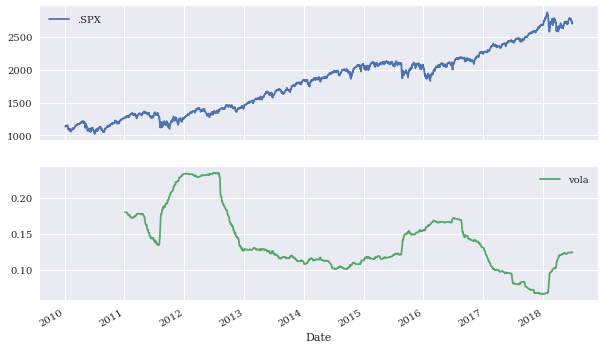

In [68]:
data[['.SPX', 'vola']].plot(subplots=True, figsize=(10, 6));  
# plt.savefig('../../images/ch01/spx_volatility.png')

## Idioms & Paradigms

In [1]:
import math
loops = 2500000
a = range(1, loops)
def f(x):
    return 3 * math.log(x) + math.cos(x) ** 2
%timeit r = [f(x) for x in a]

2.31 s ± 35.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [2]:
import numpy as np
a = np.arange(1, loops)
%timeit r = 3 * np.log(a) + np.cos(a) ** 2

152 ms ± 2.71 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [3]:
import numexpr as ne
ne.set_num_threads(1)
f = '3 * log(a) + cos(a) ** 2'
%timeit r = ne.evaluate(f)

60.9 ms ± 3.51 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
ne.set_num_threads?

In [8]:
ne.set_num_threads(4)
%timeit r = ne.evaluate(f)

24.6 ms ± 847 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Data-Driven & AI-First Finance

### Data-Driven Finance 

**This sub-section requires a Eikon license. Therefore no code is provided.**

### AI-First Finance 

In [25]:
import numpy as np
import pandas as pd

In [26]:
data = pd.read_csv('../../source/tr_eikon_eod_data.csv',
                   index_col=0, parse_dates=True)
data = pd.DataFrame(data['AAPL.O'])  
data['Returns'] = np.log(data / data.shift())  
data.dropna(inplace=True)

In [27]:
lags = 6

In [28]:
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = np.sign(data['Returns'].shift(lag))  
    cols.append(col)
data.dropna(inplace=True)

In [29]:
from sklearn.svm import SVC

In [30]:
model = SVC(gamma='scale')  

In [31]:
model.fit(data[cols], np.sign(data['Returns']))  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
data['Prediction'] = model.predict(data[cols])  

In [33]:
data['Strategy'] = data['Prediction'] * data['Returns']  

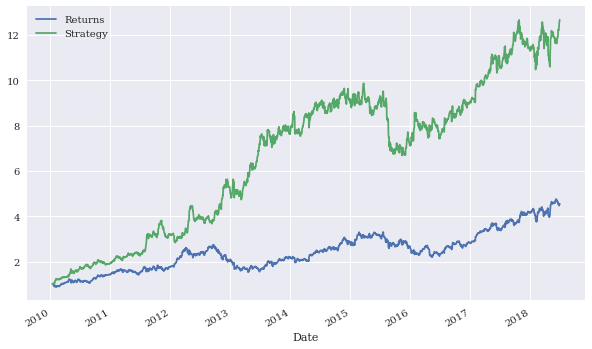

In [34]:
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));  
# plt.savefig('../../images/ch01/AAPL_trading_strategy.png');

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>